# Final Project
## Arbaz Khan

For my project, I decided to select a DecisionTreeClassifier as my preferred model. I believe that its ability to be visually represented easily, adaptability, and flexibility will make closer investigation of contributors to aircraft accidents more intuitive. In addition, decision trees are able to group together different features in contrasting manners throughout classification, which could lead to better results when there is such a high number of features.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Read in data 
# Data is sourced from the NTSB and includes accidents from 1962 to 2023.
aviationData = pd.read_csv("AviationData.csv", encoding_errors='ignore', low_memory=False)

# Convert date column to pandas datetime
aviationData["Event.Date"] = pd.to_datetime(aviationData["Event.Date"], utc = True)

# Create 'Year' column as integer type
aviationData['Year'] = pd.DatetimeIndex(aviationData['Event.Date']).year
aviationData['Year'] = aviationData['Year'].astype(int)

# Standardize formatting for unknown weather conditions
aviationData["Weather.Condition"].mask(aviationData["Weather.Condition"] == "Unk", "UNK", inplace=True)

In [2]:
# Create new column where the phase of flight is recorded as an integer.
#

# Ignore unknown phases for this column
phaseVals = ["0", "1","2", "3", "3", "4", "5", "6", "7"]

aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Taxi", "1", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Climb", "2", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Takeoff", "2", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Cruise", "3", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Maneuvering", "3", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Approach", "4", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Descent", "5", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Go-around", "6", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Landing", "7", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Other", "Unknown", inplace=True)
aviationData["Broad.phase.of.flight"].mask(aviationData["Broad.phase.of.flight"] == "Unknown", "0", inplace=True)

# Remove standing accidents
aviationData = aviationData.drop(aviationData[aviationData["Broad.phase.of.flight"] == "Standing"].index)

######################################
# Remove unknown phase accidents
aviationData["Broad.phase.of.flight"].fillna(3, inplace = True)
#aviationData = aviationData.drop(aviationData[aviationData["Broad.phase.of.flight"].isin(phaseVals) == False].index)
aviationData["Broad.phase.of.flight"] = aviationData["Broad.phase.of.flight"].astype(int)

aviationData["Phase"] = aviationData["Broad.phase.of.flight"]
aviationData.drop(columns = ['Broad.phase.of.flight'], inplace = True)

In [3]:
# Clean data for null values
aviationData["Total.Fatal.Injuries"] = aviationData["Total.Fatal.Injuries"].fillna(0)
aviationData["Total.Serious.Injuries"] = aviationData["Total.Serious.Injuries"].fillna(0)
aviationData["Total.Minor.Injuries"] = aviationData["Total.Minor.Injuries"].fillna(0)
aviationData["Total.Uninjured"] = aviationData["Total.Uninjured"].fillna(0)

# Remove flights that have 0 engines 
aviationData = aviationData.drop(aviationData[aviationData["Number.of.Engines"] == 0].index)

In [4]:
# Create easier column names
#
aviationData["Engines"] = aviationData["Number.of.Engines"]
aviationData["Uninjured"] = aviationData["Total.Uninjured"]
aviationData["Fatal"] = aviationData["Total.Fatal.Injuries"]
aviationData["Serious"] = aviationData["Total.Serious.Injuries"]
aviationData["Minor"] = aviationData["Total.Minor.Injuries"]
aviationData["Weather"] = aviationData["Weather.Condition"]

aviationData.drop(columns = ["Number.of.Engines", "Total.Uninjured", "Weather.Condition",
                            "Total.Fatal.Injuries", "Total.Serious.Injuries", 
                            "Total.Minor.Injuries"], inplace = True)

In [5]:
aviationData.drop([88886], inplace = True)

In [6]:
# Convert latitude and longitude to int 

# Remove non-numeric characters
aviationData['Latitude'] = aviationData['Latitude'].str.extract("(\d+)", expand=False)
aviationData['Longitude'] = aviationData['Longitude'].str.extract("(\d+)", expand=False)

aviationData['Latitude'] = aviationData['Latitude'].astype('Float64').astype('Int64')
aviationData['Longitude'] = aviationData['Longitude'].astype('Float64').astype('Int64')

col = ['Latitude', 'Longitude']
# For each of these columns, replace null values 
# with the median for that column.
for column in col:
    aviationData[column] = aviationData[column].fillna(aviationData[column].median())

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Arbaz\AppData\Local\Temp\ipykernel_5852\802033428.py:4: SyntaxWarning: invalid escape sequence '\d'
  aviationData['Latitude'] = aviationData['Latitude'].str.extract("(\d+)", expand=False)
C:\Users\Arbaz\AppData\Local\Temp\ipykernel_5852\802033428.py:5: SyntaxWarning: invalid escape sequence '\d'
  aviationData['Longitude'] = aviationData['Longitude'].str.extract("(\d+)", expand=False)


Text(0.5, 1.0, 'Minor Injuries Reported For Accidents in IMC Conditions by Year')

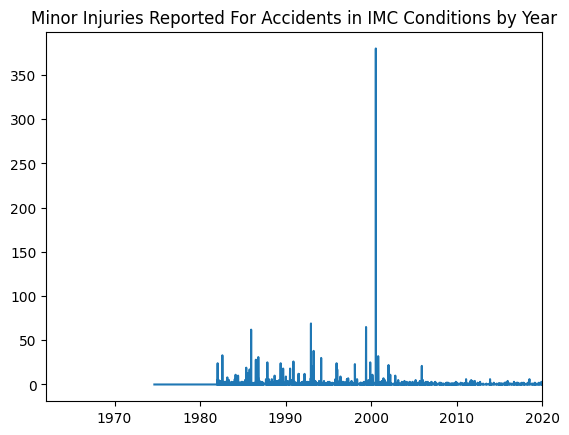

In [7]:
imcData = aviationData[aviationData["Weather"] == "IMC"]

plt.plot(imcData["Event.Date"], imcData["Minor"])
t1 = 19620101
t1 = pd.to_datetime(str(t1), format='%Y%m%d')
t2 = 20200101
t2 = pd.to_datetime(str(t2), format='%Y%m%d')

plt.xlim(t1, t2)
plt.title("Minor Injuries Reported For Accidents in IMC Conditions by Year")

Text(0.5, 1.0, 'Accident Occurences during IMC Conditions')

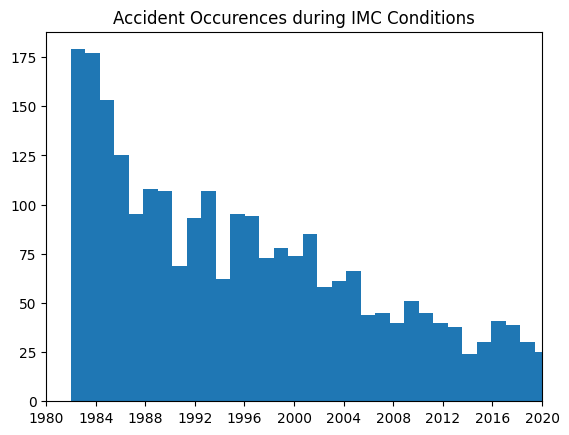

In [8]:
plt.hist(imcData["Event.Date"][imcData["Fatal"] == 0], bins = 35)
t1 = 19800101
t1 = pd.to_datetime(str(t1), format='%Y%m%d')
plt.xlim(t1, t2)
plt.title("Accident Occurences during IMC Conditions")

Text(0.5, 1.0, 'Accidents Involving Dual-Engined Aircraft Since 1982')

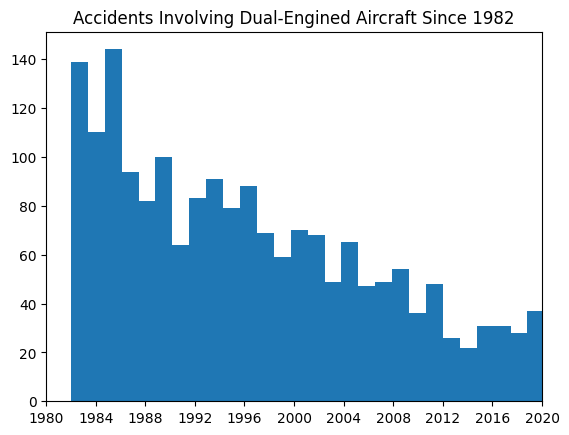

In [9]:
plt.hist(imcData["Event.Date"][imcData["Engines"] == 2], bins = 30)
plt.xlim(t1, t2)
plt.title("Accidents Involving Dual-Engined Aircraft Since 1982")

Next, additional columns are removed that will not be helpful for AI analysis, and then columns are created for the percent of passengers injured ('Pinjured'), and the total passengers on the flight ('TotalP'). The 'Pinjured' column will be the target for regression in this project, as the aim will be to reduce this value to 0, so that issues in aircraft safety that have more influence over the occurrence of an accident can be identified.

In [10]:
# Finally, drop any columns that are not useful for analysis.
# These include:
# ID numbers
# Report-related dates or information
# Unique Identifiers
aviationData.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
                            'Registration.Number', 'Report.Status', 'Publication.Date', 'Location',
                            'Country', 'Airport.Code', 'Injury.Severity', 'Aircraft.damage',
                            'Schedule', 'Purpose.of.flight', 'Year', 'Latitude', 'Longitude'],
                 inplace = True)

# Create copy of aviationData to use with regression
df = aviationData

# Create column for percent with serious injuries.
df['TotalP'] = df['Fatal'] + df['Serious'] + df['Minor'] + df['Uninjured']
df['PInjured'] = (df['Fatal'] + df['Serious'] + df['Minor']) / df['TotalP']

# Convert infinity to nan
df = df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
df['TotalP'].fillna(1, inplace=True)
df['PInjured'].fillna(0, inplace=True)

df.dropna(inplace=True)

C:\Users\Arbaz\AppData\Local\Temp\ipykernel_5852\821416499.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalP'].fillna(1, inplace=True)
C:\Users\Arbaz\AppData\Local\Temp\ipykernel_5852\821416499.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PInjured'].fillna(0, inplace=True)
C:\Users\Arbaz\AppData\Local\Temp\ipykernel_5852\821416499.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Finally, dummies are created for all columns of a categorical datatype. This will prepare these columns for the next step, which is splitting our data into testing and training sets, and using the sklearn Decision Tree classifier to fit our data.

In [13]:
col = aviationData.columns[aviationData.dtypes=='object']

# Convert categorical columns into dummy variables with get_dummies
df = pd.get_dummies(df, columns = col) 

In [14]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils

y = df['PInjured']
x = df.drop(['PInjured','Uninjured', 'Serious', 'Minor', 'Fatal', 'TotalP'], axis=1)

# Transform y because PInjured is one dimensional
lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Fit a DecisionTreeClassifier to the data
clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

# Accuracy of our model
metrics.accuracy_score(y_test, y_pred)

0.6526748971193416

In [16]:
from sklearn.metrics import confusion_matrix

# Show confusion matrix
mat = confusion_matrix(y_test, y_pred)
mat

array([[2047,    0,    0, ...,    0,    1,  368],
       [   1,    0,    0, ...,    0,    0,    0],
       [   1,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    0,    0],
       [ 659,    0,    0, ...,    0,    0,  331]], dtype=int64)

In [17]:
results = pd.DataFrame({'col_name': clf.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

## Results
Below, we have a list of the most important features ranked in our model. Here, we can see that the weather condition being VMC (or Visual Metereological Conditions, meaning relatively clear conditions) as well as the flight being a commuter flight had the most importance when it comes to predicting the percent injured. There is also a list of airlines, plane types, makes, and locations that had varying levels of importance to our results.

In [18]:
results.head(20)

,col_name
Amateur.Built_Yes,0.016263
Weather_IMC,0.012665
Engine.Type_Reciprocating,0.006722
FAR.Description_NUSN,0.006255
Aircraft.Category_Weight-Shift,0.006154
Phase,0.005144
FAR.Description_121,0.004873
Make_CESSNA,0.004416
Make_Cessna,0.004202
Engines,0.003900


Following this, let's show exactly how our model takes input data and gives a resulting prediction.

In [19]:
# Select the value at index 100 of our test data set. This will show the data
# that is input into our model to make a prediction based off of a single accident.
x2 = x.iloc[[100],:] 
y_pred2 = clf.predict(x2)
y_pred2

array([0], dtype=int64)

In [20]:
x.iloc[[100],:] 

,Phase,Engines,Airport.Name_12E Airstrip,Airport.Name_50S,Airport.Name_74 Ranch Airport,Airport.Name_A R S SPORT STRIP,Airport.Name_A&P Airpark Airport,Airport.Name_A.L. Mangham Jr. Regional,Airport.Name_ABILENE RGNL,Airport.Name_ACADIANA RGNL,...,Air.carrier_Zoltan Horvath,Air.carrier_Zone Aviation,Air.carrier_Zulu Aviation Corp.,Air.carrier_howard L. Patton,Air.carrier_jetBlue Airways,Air.carrier_new Flyers Association,Air.carrier_pharaoh llc,Weather_IMC,Weather_UNK,Weather_VMC
2916,3,2.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [21]:
df.iloc[[100],:]['PInjured'] 

2916    0.0
Name: PInjured, dtype: float64

This is an  accident with 0 injuries, so it is possible that this value specifically is easier to predict, and our lack of accuracy comes from accidents that actually had injuries. Some more data analysis is likely required to improve our analysis as well as our results. In addition, a number of columns should be additionally modified or even removed, such as longitude and latitude, as these values are continuous and likely have an abnormal spread that could make model-fitting difficult.